# OpenCV Tutorial

In [17]:
# import opencv module
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

# For interactive python:
%matplotlib inline  

## Reading the image

We can use OpenCV's cv2.imread() function to read an image. The image is read as a numpy array, which means we can use both Numpy OR OpenCV to perform operations on an image.

In [18]:
#img = cv2.imread('lenna.png')
img = cv2.imread('separate.png')

In [19]:
# What the 'img' variable looks like
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
# 'img' variable type
type(img)

numpy.ndarray

In [21]:
# We can also find the size and dimensions of the image. Both .size and .shape are numpy functions
img.size   # total number of pixels

921600

In [22]:
# shape (dimensions) of the image
img.shape

(480, 640, 3)

### Displaying an Image

Displaying an image can be done with the OpenCV function: cv2.imshow('image display name', variable_name). We also need to execute a cv2.waitKey() function to stop Python from crashing.

```
cv2.imshow('lenna', img)
cv2.waitKey(1000)   # wait for 1 second

```

However, this does not work in Jupyter's interactive python. We must use matplotlib to display images here

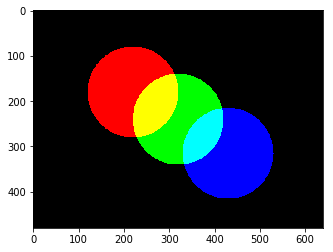

In [23]:
# for single images, matplotlib may be better
plt.imshow(img)


__Notice anything weird?__  
The color of the image looks weird because OpenCV uses a BGR color scheme, while Matplotlib displays images in RGB. Thus, we must convert the image to RGB first

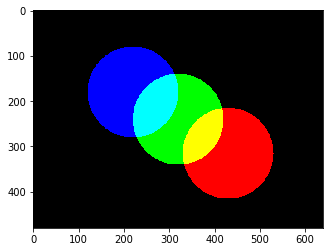

In [24]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)



Now we get the correct image. Lets run some operations on the image

## Basic Operations

A color image is represented as a 3D array. It is a collection of three 2D images in the R, G, and B channels.  
We can use numpy to split the image into its channels.

In [25]:
# Split into three separate images using numpy indexing
red_img = img[:,:,0]
green_img = img[:,:,1]
blue_img = img[:,:,2]

(480, 640)

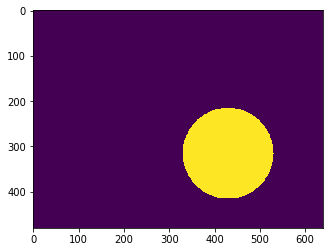

In [26]:
plt.imshow(red_img)
red_img.shape

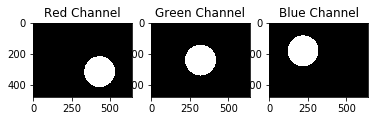

In [33]:
# Display all three images
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Red Channel')
ax1.imshow(red_img, cmap='gray')

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Green Channel')
ax2.imshow(green_img, cmap='gray')

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Blue Channel')
ax3.imshow(blue_img, cmap='gray')

We can also modify pixel values using numpy indexing. Let's create a blue patch in the middle of the image.

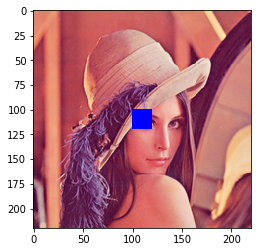

In [34]:
img = cv2.imread('lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blue_patch_img = copy.deepcopy(img)    #create a deep copy of the image. Why deep copy?
blue_patch_img[100:120, 100:120, :] = [0,0,255]
plt.imshow(blue_patch_img)


In [37]:
#simple copy
#1. mutable 객체의 경우
a = [1, 2, 3, 4]
b = a     # shallow copy
print(b)    # [1, 2, 3, 4]
b[2] = 100   # b의 item 변경
print(b)    # [1, 2, 100, 4]
print(a)    # [1, 2, 100, 4], a의 item도 수정됨!!

#2. immutable 객체의 경우
a = 10
b = a     
print(b)    # 10 출력력
b = "abc"  
print(b)    # abc 출력
print(a)    # 10 출력

[1, 2, 3, 4]
[1, 2, 100, 4]
[1, 2, 100, 4]
10
abc
10


In [36]:
#shallow copy
import copy

a = [1, [1, 2, 3]]
b = copy.copy(a)    # shallow copy 발생     
print(b)    # [1, [1, 2, 3]] 출력
b[0] = 100  
print(b)    # [100, [1, 2, 3]] 출력, 
print(a)    # [1, [1, 2, 3]] 출력, shallow copy 가 발생해 복사된 리스트는 별도의 객체이므로 item을 수정하면 복사본만 수정된다. (immutable 객체의 경우)

c = copy.copy(a)
c[1].append(4)    # 리스트의 두번째 item(내부리스트)에 4를 추가
print(c)    # [1, [1, 2, 3, 4]] 출력
print(a)    # [1, [1, 2, 3, 4]] 출력, a가 c와 똑같이 수정된 이유는 리스트의 item 내부의 객체는 동일한 객체이므로 mutable한 리스트를 수정할때는 둘다 값이 변경됨

[1, [1, 2, 3]]
[100, [1, 2, 3]]
[1, [1, 2, 3]]
[1, [1, 2, 3, 4]]
[1, [1, 2, 3, 4]]


In [38]:
#deep copy
import copy

a = [1, [1, 2, 3]]
b = copy.deepcopy(a)    # deep copy 실행     
print(b)    # [1, [1, 2, 3]] 출력
b[0] = 100
b[1].append(4)  
print(b)    # [100, [1, 2, 3, 4]] 출력
print(a)    # [1, [1, 2, 3]] 출력

[1, [1, 2, 3]]
[100, [1, 2, 3, 4]]
[1, [1, 2, 3]]


We can also copy Lenna's face onto the image.

In [39]:
new_img = copy.deepcopy(img)   # Again, create a deep copy
lenna_face = img[100:160, 80:150, :]

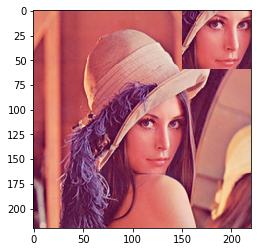

In [40]:
# Make sure to match the dimensions! If you don't you'll get a dimension mismatch error
new_img[0:60, 150:220, :]=lenna_face
plt.imshow(new_img)

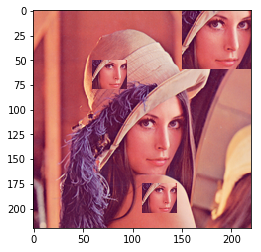

In [41]:
# Lastly, we can also resize the image and place it wherever it fits!
# Currently, lenna_face has dimension of (60,70, 3). Let's change it to (30, 35, 3)
lenna_face = cv2.resize(lenna_face, (35, 30))   # Note that resize uses (x, y) 
new_img[50:80, 60:95, :] = lenna_face
new_img[175:205, 110:145, :] = lenna_face
plt.imshow(new_img)

### OpenCV Functions 

There are many OpenCV functions that you may use. A friendly read-the-docs page that I used can be found in this __[link](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html).__    
Otherwise, use Google.  

canny edge detection:[link](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html?highlight=canny)
  

Let's try using the Canny Edge Detector. The Canny Edge detector is a very commonly used edge detector in computer vision.
  
Quick tip: In Jupyter, pressing __Tab__ will show you a list of available functions from the imported list of packages. Also, pressing __Shift+Tab__ inside the parentheses of a function will show you the possible input parameters of the function.

In [42]:
canny = cv2.Canny(img, 100, 200)
canny2 = cv2.Canny(img, 50, 120)
canny3 = cv2.Canny(img,255/3,255)

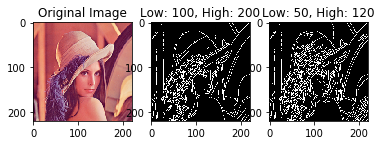

In [43]:
# Display images side by side
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,3,1)
ax1.set_title('Original Image')
ax1.imshow(img)

ax2 = fig1.add_subplot(1,3,2)
ax2.set_title('Low: 100, High: 200')
ax2.imshow(canny, cmap='gray')

ax3 = fig1.add_subplot(1,3,3)
ax3.set_title('Low: 50, High: 120')
ax3.imshow(canny2, cmap='gray')

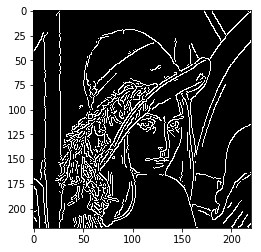

In [44]:
plt.imshow(canny, cmap='gray')

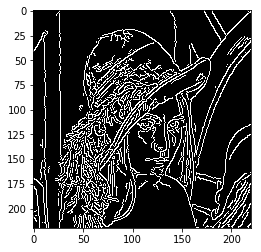

In [45]:
plt.imshow(canny2,cmap='gray')

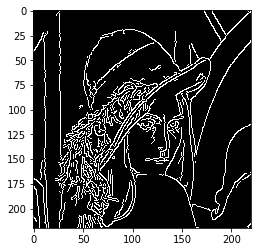

In [46]:
plt.imshow(canny3,cmap='gray')

In [47]:
# Save file into local disk
cv2.imwrite('canny_L100_H200.png', canny)

True

## Video Feed


It's nice to work with images, but it's also important to work with live video. 
We can use cv2.VideoCapture() function to capture video. The integer inside cv2.VideoCapture() indicates which camera you want to record from. You can check the list of available cameras by using the following command in __Ubuntu__:

```
ls /dev/video*
```

You can execute the code below to display the video feed from your webcam using OpenCV.  
__However, closing the video feed will cause Python to crash and thus, kill the Jupyter kernel with it :).__  
It may be better to run copy-paste this code into normal python and run it from there.

In [24]:
# turn on webcam, set parameters
# Notice that when this cell is run, your webcam LED will turn on
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 600)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 400)

True

In [25]:
while True:
    _,frame = cap.read()
    cv2.imshow('original', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()